In [1]:
#problem statement
#Historical marketing data of an insurance company to predict if a client will subscribe to the insurance or not
import pandas as pd
import numpy as np                     
import seaborn as sn              
import matplotlib.pyplot as plt
%matplotlib inline
# For ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv( "Dataset.csv")

In [3]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [4]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [5]:
data.shape

(45211, 11)

In [6]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [7]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [8]:
# See the % distribution of the "y"
data['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

<AxesSubplot:>

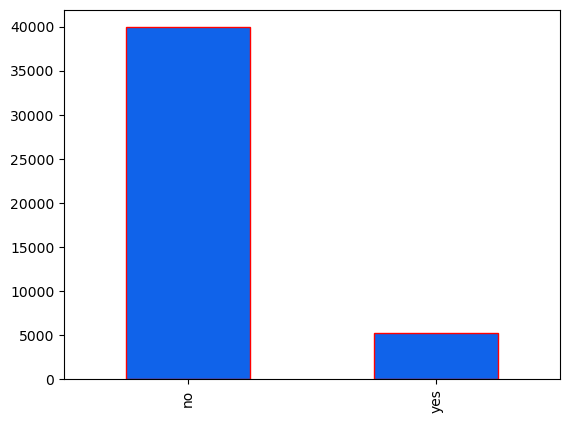

In [9]:
# Bar plot of freequencies
data['y'].value_counts().plot.bar(color = np.random.rand(3,), ec='red')

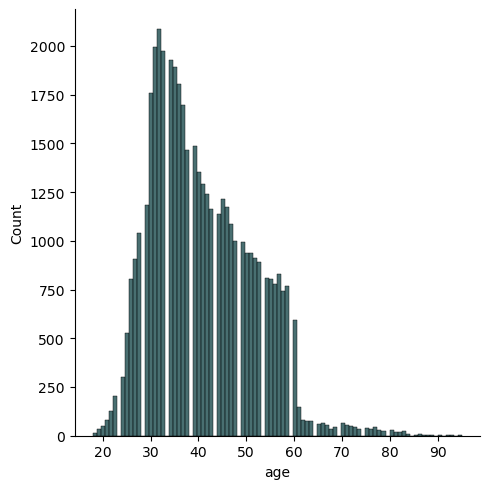

In [10]:
sn.displot(data["age"], color=np.random.rand(3,))

<AxesSubplot:>

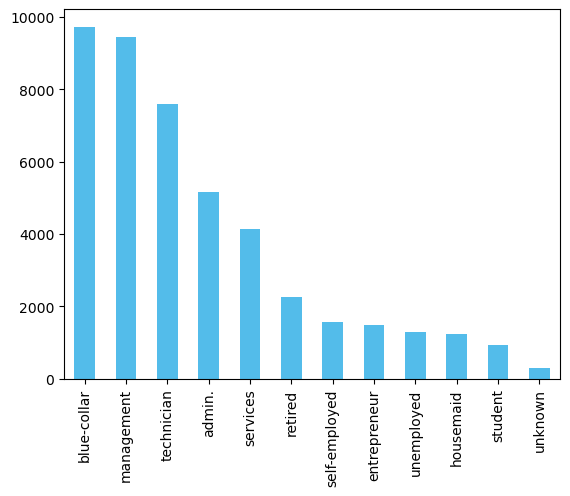

In [11]:
data['job'].value_counts().plot.bar(color = np.random.rand(3,))

<AxesSubplot:>

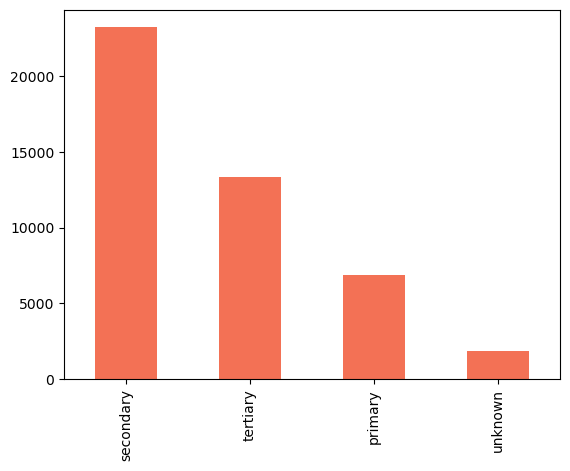

In [12]:
data['education_qual'].value_counts().plot.bar(color = np.random.rand(3,))

y                no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34


Text(0, 0.5, 'Percentage')

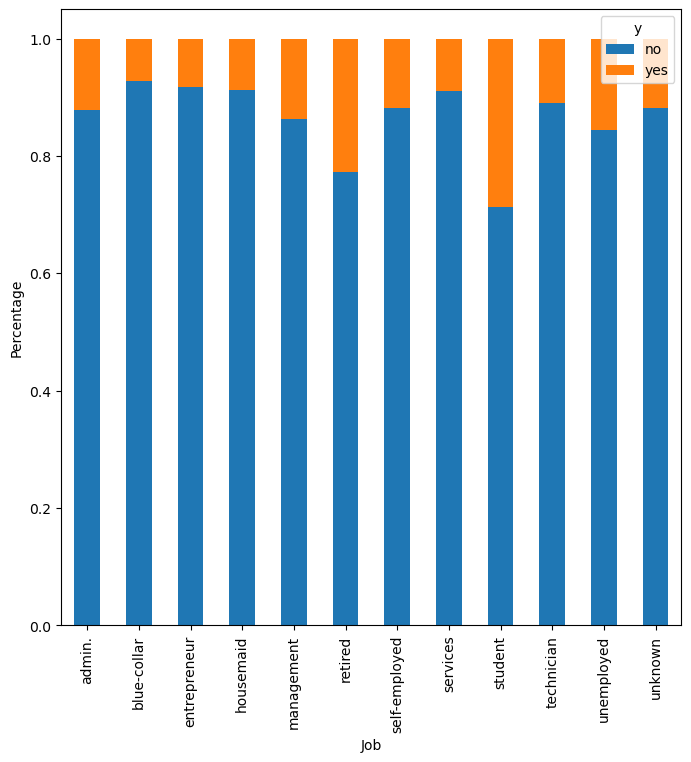

In [13]:
print(pd.crosstab(data['job'],data['y']))

job=pd.crosstab(data['job'],data['y'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

y                  no   yes
education_qual             
primary          6260   591
secondary       20752  2450
tertiary        11305  1996
unknown          1605   252


Text(0, 0.5, 'Percentage')

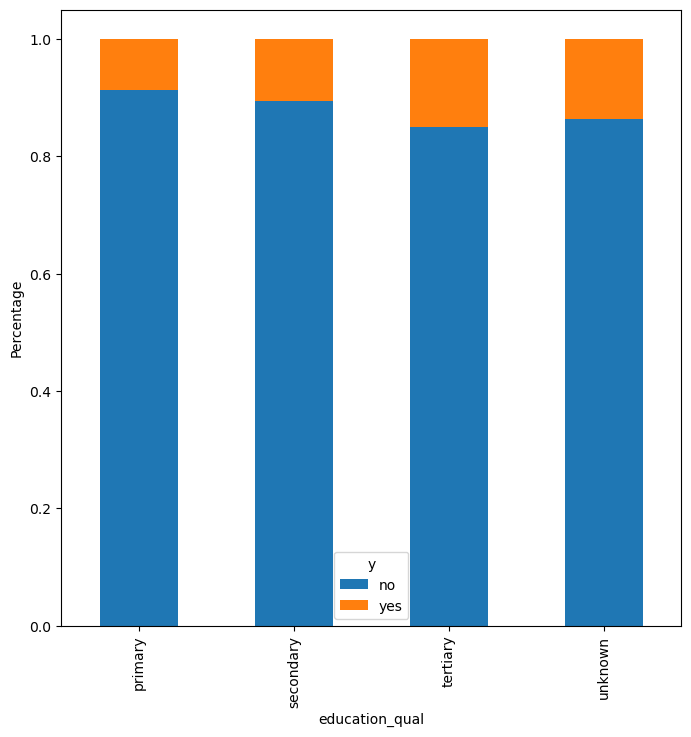

In [14]:
print(pd.crosstab(data['education_qual'],data['y']))

education_qual=pd.crosstab(data['education_qual'],data['y'])
education_qual.div(education_qual.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('education_qual')
plt.ylabel('Percentage')

y            no   yes
marital              
divorced   4585   622
married   24459  2755
single    10878  1912


Text(0, 0.5, 'Percentage')

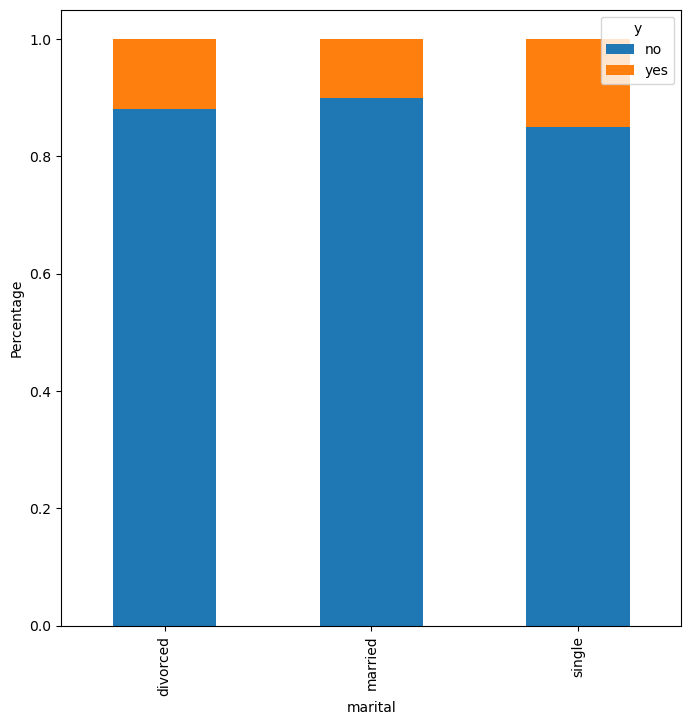

In [15]:
print(pd.crosstab(data['marital'],data['y']))#cross-tabulation or crosstab between the 'marital' column and the target variable 'y'

marital=pd.crosstab(data['marital'],data['y'])
marital.div(marital.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('marital')
plt.ylabel('Percentage')

In [16]:
data['y'].replace('no', 0,inplace=True)
data['y'].replace('yes', 1,inplace=True)

<AxesSubplot:>

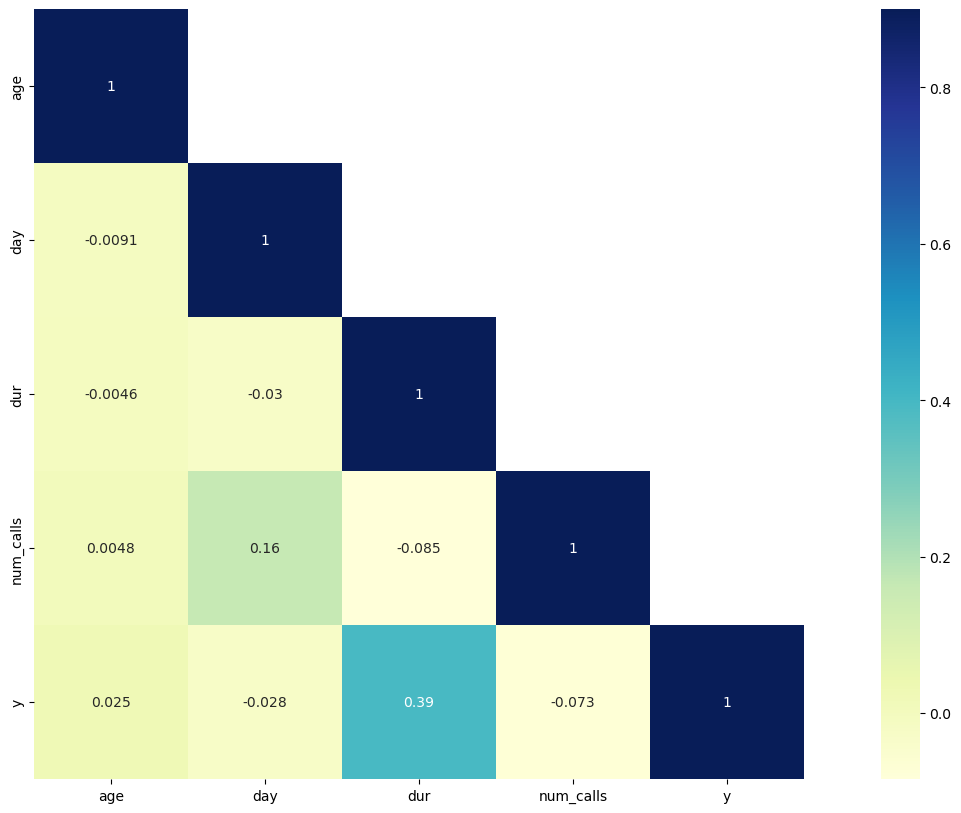

In [17]:
corr = data.corr()#correlation coefficients between all pairs of numeric columns in the DataFrame
mask = np.array(corr)#This converts the correlation DataFrame corr into a NumPy array and assigns it to the variable mask.
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [18]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [19]:
target = data['y']#This line extracts the target variable 'y' from the DataFrame data and assigns it to the variable target.
data = data.drop('y',1)#the operation should be performed along the columns (axis=1).

In [20]:
data = pd.get_dummies(data)# It converts categorical variables into a set of binary variables,
#where each category of the original variable becomes a new binary variable (0 or 1)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.25, random_state = 42)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lreg = LogisticRegression()

In [25]:
# fiting the model on our data.
lreg.fit(X_train,Y_train)

LogisticRegression()

In [26]:
L_pred = lreg.predict(X_test)

In [27]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [28]:

print("Accuracy Score of Logistic Reg:",round(accuracy_score(Y_test, L_pred),2))

Accuracy Score of Logistic Reg: 0.9


In [29]:
L_AUC_ROC = roc_auc_score(Y_test, L_pred)
print("ROC AUC Score of Logistic Reg:",round((L_AUC_ROC),2))

ROC AUC Score of Logistic Reg: 0.66


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtc = DecisionTreeClassifier(random_state=0, splitter='best')

In [32]:

dtc.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [33]:
D_pred = dtc.predict(X_test)

In [34]:
print("Accuracy Score of Decision Tree Cl:",round(accuracy_score(Y_test, D_pred), 1))

Accuracy Score of Decision Tree Cl: 0.9


In [35]:

D_AUC_ROC = roc_auc_score(Y_test, D_pred)
print("ROC AUC Score of Decision Tree Cl:",round(D_AUC_ROC, 2))

ROC AUC Score of Decision Tree Cl: 0.7


In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
KNC = KNeighborsClassifier()

In [38]:
KNC.fit(X_train, Y_train)

KNeighborsClassifier()

In [39]:
K_pred = KNC.predict(X_test)

In [40]:
print("Accuracy Score of K Neighbors Cl:",round(accuracy_score(Y_test, K_pred), 2))

Accuracy Score of K Neighbors Cl: 0.88


In [41]:
K_AUC_ROC = roc_auc_score(Y_test, K_pred)
print("ROC AUC Score of K Neighbors Cl:",round(K_AUC_ROC, 2))

ROC AUC Score of K Neighbors Cl: 0.6


In [42]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, Y_train)
y_pred= rf.predict(X_test)

In [43]:
print("Accuracy Score of Random Forest Cl:",round(accuracy_score(Y_test, y_pred), 2))

Accuracy Score of Random Forest Cl: 0.88


In [44]:
R_AUC_ROC = roc_auc_score(Y_test, y_pred)
print("ROC AUC Score of Random Forest Cl:",round(R_AUC_ROC, 2))

ROC AUC Score of Random Forest Cl: 0.5


In [45]:
#As our evalution metrix is AUROC. Here, we can see that our Decision Tree Classifier Model have ROC AUC Score of 0.7 and as well as Accuracy Score around 0.9.
#So, We will use Desicion Tree Model and 
#it'll predict output as much as 90% good. So it model's predicted output data will help our companies employ to direct target, agreeable or conversion clients more effectively and convert them to happy customer. 
#So it'll save time of employ as well as company'.
#In the end this predictions will help company to run time saver and cost effective tele marketing campaigns with better customer conversion ratio.
#We can also design camaign were: employ will connect to prospect clients first, from the predicted output and successfully sell them term insurance.

In [46]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model 
  model.fit(X_train,Y_train) #train the model 
  print("Learning rate : ", lr," Train score : ", model.score(X_train,Y_train)," Cross-Val score : ", np.mean(cross_val_score(model, X_test,Y_test, cv=10)))
     

Learning rate :  0.01  Train score :  0.8983720655892414  Cross-Val score :  0.8902949852507375
Learning rate :  0.02  Train score :  0.9093134363572019  Cross-Val score :  0.8969309797109613
Learning rate :  0.03  Train score :  0.9132358145570367  Cross-Val score :  0.8989663779410499
Learning rate :  0.04  Train score :  0.9166863277102748  Cross-Val score :  0.9011784543398825
Learning rate :  0.05  Train score :  0.9191636192049074  Cross-Val score :  0.9021519839127408
Learning rate :  0.1  Train score :  0.9287483779639023  Cross-Val score :  0.9036549220284344
Learning rate :  0.11  Train score :  0.9300460068420432  Cross-Val score :  0.9015324366407673
Learning rate :  0.12  Train score :  0.9322578742479651  Cross-Val score :  0.9017977668755819
Learning rate :  0.13  Train score :  0.9341158428689394  Cross-Val score :  0.9023287403269092
Learning rate :  0.14  Train score :  0.9353544886162557  Cross-Val score :  0.901974053817203
Learning rate :  0.15  Train score :  0.93

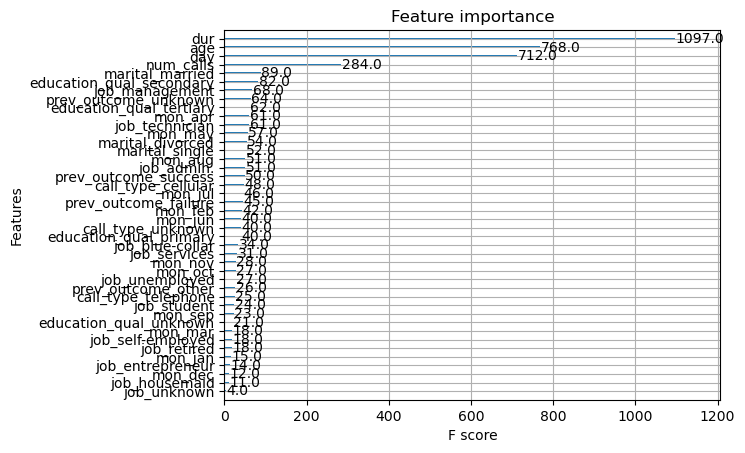

In [47]:

from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()